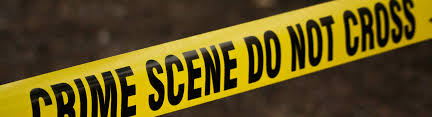

**LA Crime**:
This data is collected on the basis of LAPD radio comms and Investigation done by them after the crime is reported. It contains crime data from 2020 to present(Jan 2022). In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.
The Dataset includes 20 columns which includes information on areas such as -

* Record Number
* Date and time at which crime was reported/occurred
* Victim Age,Sex, Ethnicity
* Location where the crime took place
* Weapon of crime
* Status of the case

source: https://www.kaggle.com/hemil26/crime-in-los-angeles

# **Crime Observation:**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
la_df = pd.read_csv('/content/drive/MyDrive/LA Crime /crime_in_la.csv')
la_df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,10304468,08/01/2020,22:30,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/01/2020,03:30,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020,17:30,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020,04:15,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/01/2020,00:30,1,Central,163,121,"RAPE, FORCIBLE",0413 1822 1262 1415,25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S BROADWAY,34.0452,-118.2534


In [3]:
la_df.tail()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
418604,221204786,16/01/2022,05:45,12,77th Street,1235,210,ROBBERY,1822 0202 0334 0302 0355 0354 0416 0344 0916 1310,42,M,H,STREET,102.0,HAND GUN,IC,Invest Cont,59TH ST,33.9875,-118.2959
418605,220304777,09/01/2022,04:00,3,Southwest,376,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0104 1822 1300 0344,28,M,B,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,3900 S HOBART BL,34.0144,-118.3078
418606,221704743,17/01/2022,03:06,17,Devonshire,1785,310,BURGLARY,0329 0216 0209 0206 1607,0,X,X,RESTAURANT/FAST FOOD,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,18100 NORDHOFF ST,34.2340,-118.5375
418607,220604418,10/01/2022,09:00,6,Hollywood,678,815,SEXUAL PENETRATION W/FOREIGN OBJECT,0400 1305 1822 0448 0344 0500 0522 0515 1218,25,F,B,STREET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,SANTA MONICA BL,34.0908,-118.3092
418608,220804602,16/01/2022,11:00,8,West LA,852,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400,27,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1600 FEDERAL AV,34.0413,-118.4561


In [4]:
la_df.shape

(418609, 20)

In [5]:
la_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418609 entries, 0 to 418608
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           418609 non-null  int64  
 1   DATE OCC        418609 non-null  object 
 2   TIME OCC        418609 non-null  object 
 3   AREA            418609 non-null  int64  
 4   AREA NAME       418609 non-null  object 
 5   Rpt Dist No     418609 non-null  int64  
 6   Crm Cd          418609 non-null  int64  
 7   Crm Cd Desc     418609 non-null  object 
 8   Mocodes         418609 non-null  object 
 9   Vict Age        418609 non-null  int64  
 10  Vict Sex        418609 non-null  object 
 11  Vict Descent    418609 non-null  object 
 12  Premis Desc     418451 non-null  object 
 13  Weapon Used Cd  418609 non-null  float64
 14  Weapon Desc     418609 non-null  object 
 15  Status          418609 non-null  object 
 16  Status Desc     418609 non-null  object 
 17  LOCATION  

**Looking in to the victim descriptions to get a better view before the Analysis:**

In [6]:
victims = la_df[['Vict Age', 'Vict Sex', 'Vict Descent']]
victims.head(10)

,Vict Age,Vict Sex,Vict Descent
0,36,F,B
1,25,M,H
2,76,F,W
3,31,X,X
4,25,F,H
5,23,M,H
6,0,X,X
7,23,M,B
8,29,M,A
9,35,M,O


On checking in the ages found there were 0 in ages which needs to be removed for further analysis:

In [7]:
victims['Vict Age'].replace([0,'No Age'], inplace = True)
victims.head(20)

,Vict Age,Vict Sex,Vict Descent
0,36,F,B
1,25,M,H
2,76,F,W
3,31,X,X
4,25,F,H
5,23,M,H
6,23,X,X
7,23,M,B
8,29,M,A
9,35,M,O


In [8]:
victims.isnull().any()

Vict Age        False
Vict Sex        False
Vict Descent    False
dtype: bool

So there are no null values present in the victim descriptions now lets look into Victim Age, Sex and Descent
lets look into the age distribution of the crimes that happen-

**Victim Age:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


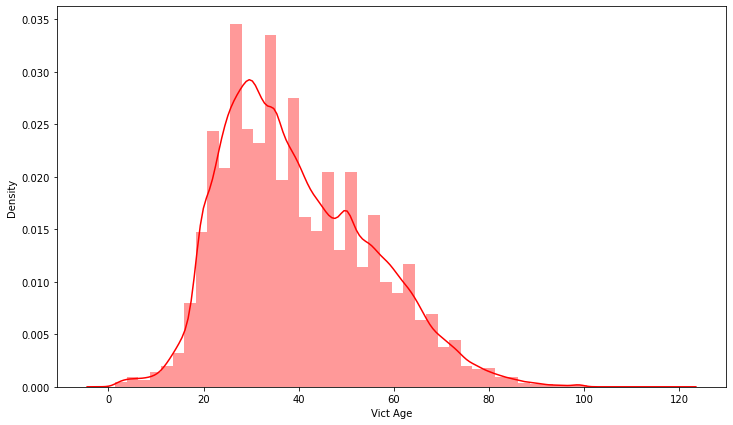

In [9]:
f, ax = plt.subplots(figsize = (12,7))
ax =sns.distplot(victims['Vict Age'].dropna(), color = 'red')
plt.show()

On checking in with the age trend of the crime it is seen that most crimes have happened between the age group of 20-60yrs. 
Now we would look-into gender based crime count.

**Victim sex:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


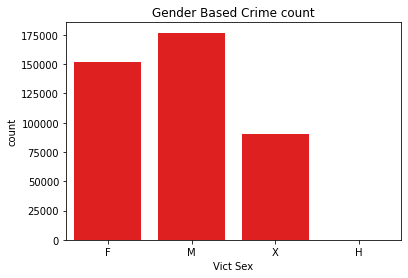

In [10]:
plt.title('Gender Based Crime count')
sns.countplot(victims['Vict Sex'], color = 'red')

On analyzing the gender based crimes we see Males are the highest number of victim. 
Below we would check in with the age groups that are most prone to murder!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


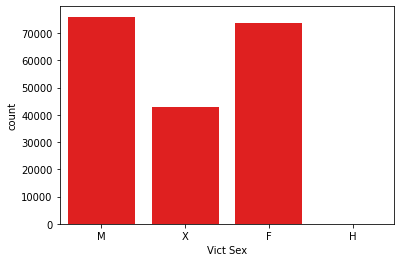

In [11]:
sns.countplot('Vict Sex', data = victims[(victims['Vict Age'] >= 10) & (victims['Vict Age'] <= 35)], color = 'red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


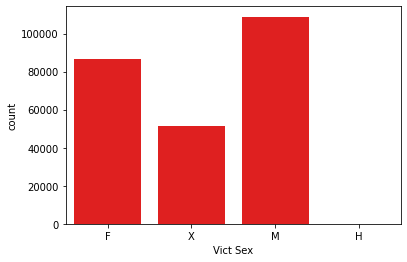

In [12]:
sns.countplot('Vict Sex', data = victims[(victims['Vict Age'] >= 30) & (victims['Vict Age'] <= 60)], color = 'red')

**Victim Descent:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


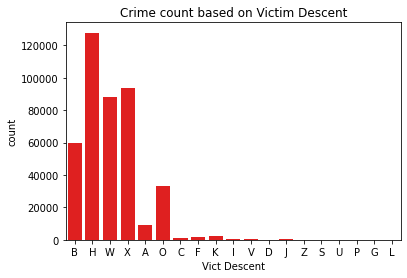

In [13]:
plt.title('Crime count based on Victim Descent')
sns.countplot('Vict Descent', data = victims, color = 'red')

The most victims of the crimes are the Hispanics so we see a bit racial baiseness involved! 
Lets check in with the age-groups.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


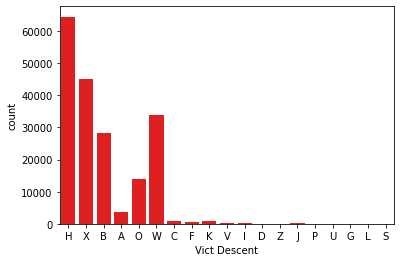

In [14]:
sns.countplot('Vict Descent', data = victims[(victims['Vict Age'] >= 10) & (victims['Vict Age'] <= 35)], color= 'red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


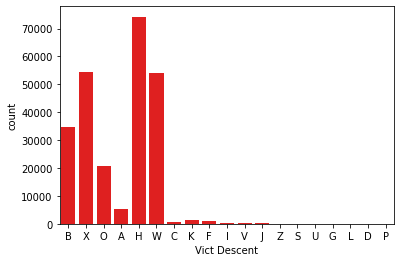

In [15]:
sns.countplot('Vict Descent', data = victims[(victims['Vict Age'] >= 30) & (victims['Vict Age'] <= 60)] , color= 'red')

**Lets look into the area with most crime rate:**

In [16]:
area = la_df[['AREA', 'AREA NAME', 'Rpt Dist No']]
area.head()

,AREA,AREA NAME,Rpt Dist No
0,3,Southwest,377
1,1,Central,163
2,15,N Hollywood,1543
3,19,Mission,1998
4,1,Central,163


In [17]:
area.isnull().any()

AREA           False
AREA NAME      False
Rpt Dist No    False
dtype: bool

In [18]:
area.rename(columns = {'Rpt Dist No': 'Reported District'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
area.head()

,AREA,AREA NAME,Reported District
0,3,Southwest,377
1,1,Central,163
2,15,N Hollywood,1543
3,19,Mission,1998
4,1,Central,163


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


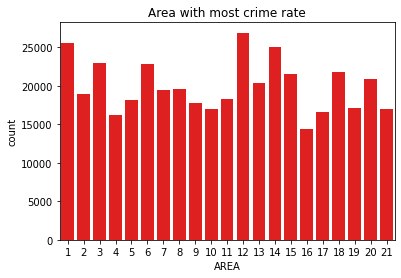

In [20]:

plt.title('Area with most crime rate')
sns.countplot( 'AREA', data = area, color = 'red')

On Analyzing we see that area 12 & 1 has most crime rates.

**Types of Crime:**

In [21]:
crime = la_df[['Crm Cd', 'Crm Cd Desc']]
crime.head()

,Crm Cd,Crm Cd Desc
0,624,BATTERY - SIMPLE ASSAULT
1,624,BATTERY - SIMPLE ASSAULT
2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
4,121,"RAPE, FORCIBLE"


In [22]:
crime.isnull().any()

Crm Cd         False
Crm Cd Desc    False
dtype: bool

Top 20 Crimes:

In [23]:
crime['Crm Cd Desc'].value_counts()[:20]

VEHICLE - STOLEN                                            46185
BATTERY - SIMPLE ASSAULT                                    33754
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     27448
BURGLARY FROM VEHICLE                                       27279
BURGLARY                                                    25886
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              25147
THEFT PLAIN - PETTY ($950 & UNDER)                          22518
INTIMATE PARTNER - SIMPLE ASSAULT                           22322
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             18493
THEFT OF IDENTITY                                           18249
ROBBERY                                                     14887
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    13694
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         12771
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    12432
CRIMINAL THREATS - NO WEAPON DISPLAYED                       8795
SHOPLIFTIN

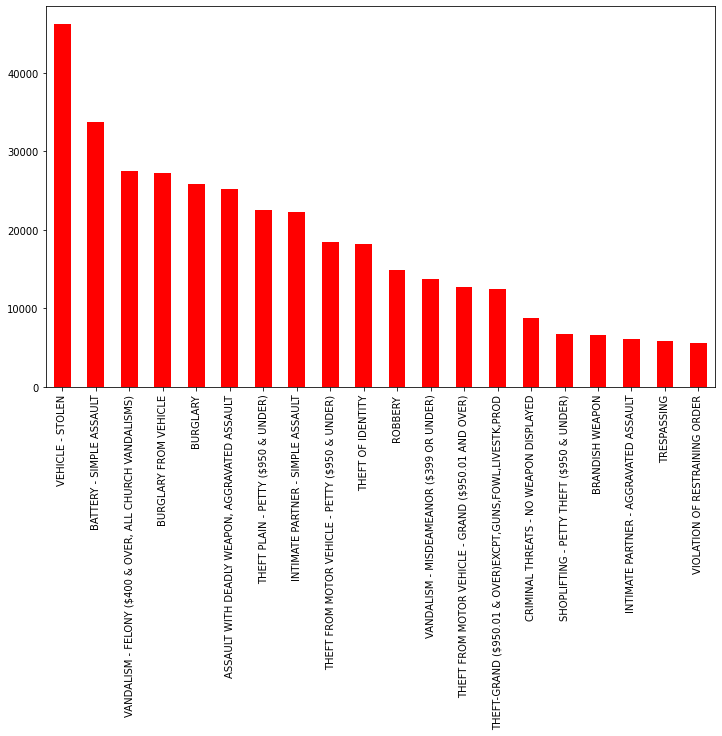

In [24]:
crime['Crm Cd Desc'].value_counts()[:20].plot( kind = 'bar', color = 'red', figsize = (12,7))

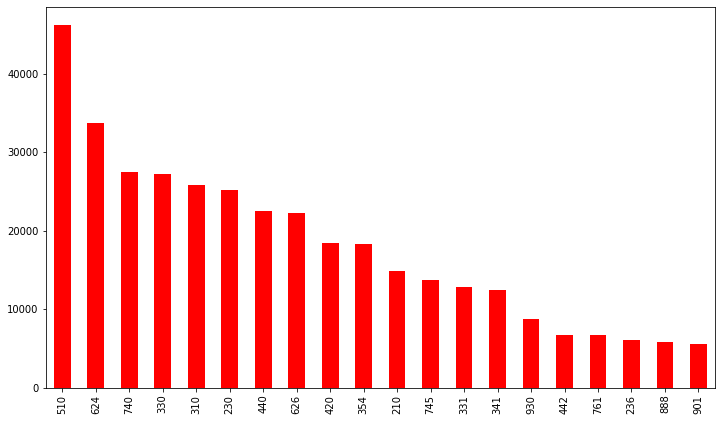

In [25]:
crime['Crm Cd'].value_counts()[:20].plot( kind = 'bar', color = 'red', figsize = (12,7))

Most crimes that happen are the Stolen Vehicle & Battery-Simple Assult.

**Types of Weapons involved in the crimes:**

In [26]:
weapon = la_df[['Weapon Used Cd', 'Weapon Desc']]
weapon.head()

,Weapon Used Cd,Weapon Desc
0,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
1,500.0,UNKNOWN WEAPON/OTHER WEAPON
2,500.0,UNKNOWN WEAPON/OTHER WEAPON
3,500.0,UNKNOWN WEAPON/OTHER WEAPON
4,500.0,UNKNOWN WEAPON/OTHER WEAPON


In [27]:
weapon.isnull().any()

Weapon Used Cd    False
Weapon Desc       False
dtype: bool

Top 10 Weapons:

In [28]:
weapon.value_counts()[:10]

Weapon Used Cd  Weapon Desc                                   
500.0           UNKNOWN WEAPON/OTHER WEAPON                       283169
400.0           STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     80782
511.0           VERBAL THREAT                                      10805
102.0           HAND GUN                                            9333
109.0           SEMI-AUTOMATIC PISTOL                               3464
200.0           KNIFE WITH BLADE 6INCHES OR LESS                    3261
106.0           UNKNOWN FIREARM                                     3170
207.0           OTHER KNIFE                                         2620
512.0           MACE/PEPPER SPRAY                                   1582
307.0           VEHICLE                                             1561
dtype: int64

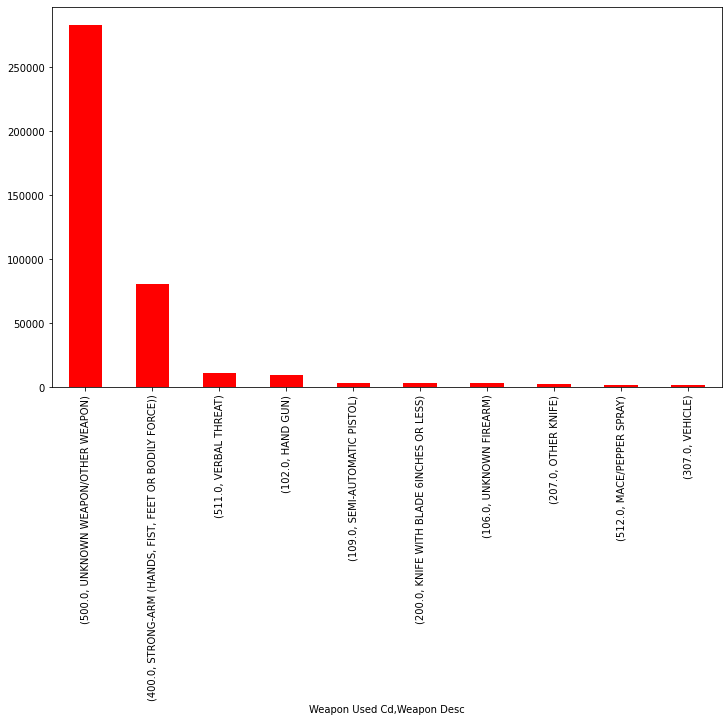

In [29]:
weapon.value_counts()[:10].plot(kind = 'bar', color ='red', figsize = (12,7))

There is not much of weapons found that are guns or sharp objects, most cases have Unknown weapons.
While there is use of physical force and Verbal threat seen during these crimes.

# **Exploratory Data-Analysis:**

**Area Crime:**
deep dive into the crimes that have show significantly on rise in Area 12 and 1!

In [30]:
area_crime = pd.concat(objs=[area,crime], axis = 1)
area_crime.head(10)

,AREA,AREA NAME,Reported District,Crm Cd,Crm Cd Desc
0,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT
1,1,Central,163,624,BATTERY - SIMPLE ASSAULT
2,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
3,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
4,1,Central,163,121,"RAPE, FORCIBLE"
5,1,Central,161,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
6,1,Central,155,946,OTHER MISCELLANEOUS CRIME
7,1,Central,101,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
8,1,Central,192,330,BURGLARY FROM VEHICLE
9,1,Central,111,930,CRIMINAL THREATS - NO WEAPON DISPLAYED


In [31]:
print('Crimes in area 12'),len(area_crime[(area_crime['AREA']== 12)])

Crimes in area 12


(None, 26914)

In [32]:
print('crimes in area 1'), len(area_crime[(area_crime['AREA']== 1)])

crimes in area 1


(None, 25605)

In [33]:
area_crime12 =  area_crime[(area_crime['AREA']== 12)]
area_crime1 = area_crime[(area_crime['AREA']== 1)]




Top 5 Crimes in AREA 12:

In [34]:
area_crime12['Crm Cd Desc'].value_counts()[:5]

VEHICLE - STOLEN                                  3471
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    2932
BATTERY - SIMPLE ASSAULT                          2057
INTIMATE PARTNER - SIMPLE ASSAULT                 1988
ROBBERY                                           1755
Name: Crm Cd Desc, dtype: int64

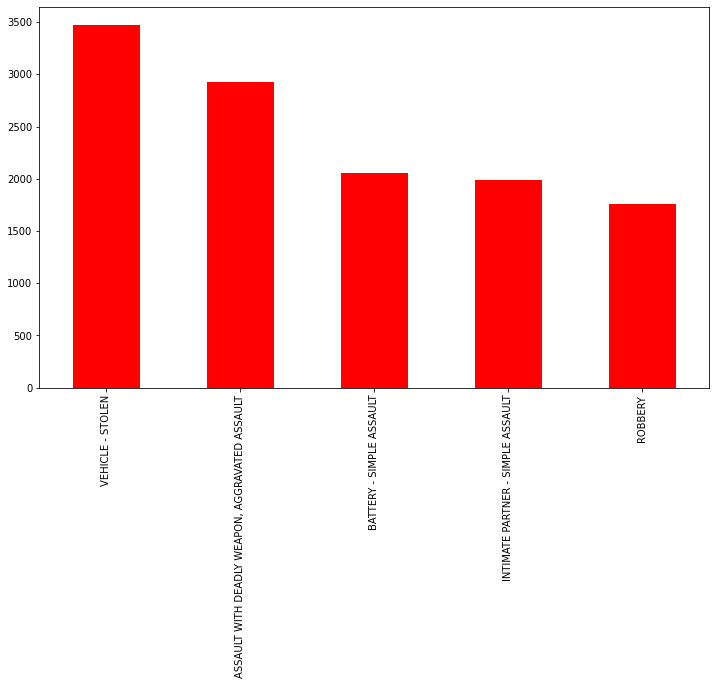

In [35]:
area_crime12['Crm Cd Desc'].value_counts()[:5].plot(kind = 'bar', color = 'red', figsize = (12,7))

On analyzing we see that AREA 12 has major crimes that involve Vehicle stealing and Assault with deadly weapon.

Top 5 crimes in AREA 5:

In [36]:
area_crime1['Crm Cd Desc'].value_counts()[:5]

BURGLARY FROM VEHICLE                                      3043
BATTERY - SIMPLE ASSAULT                                   2898
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    2056
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             1792
THEFT PLAIN - PETTY ($950 & UNDER)                         1671
Name: Crm Cd Desc, dtype: int64

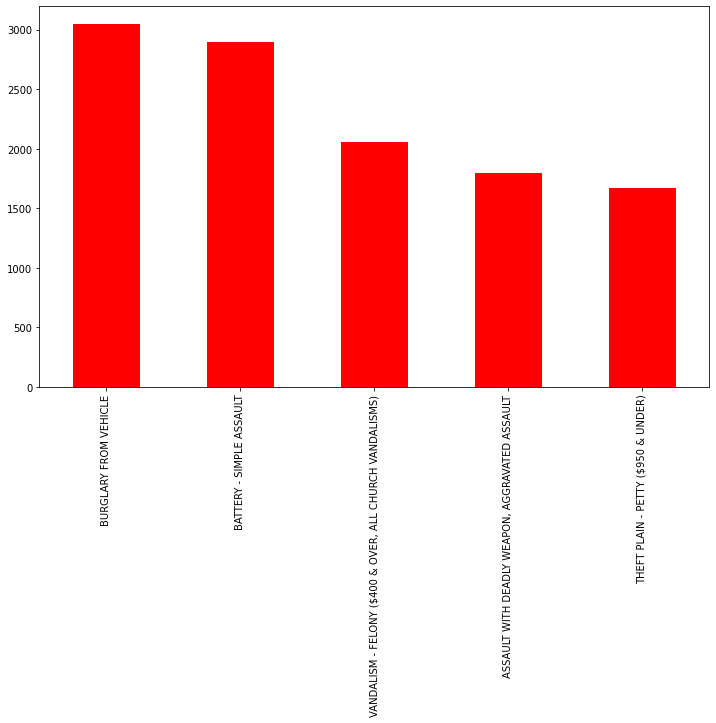

In [37]:
area_crime1['Crm Cd Desc'].value_counts()[:5].plot(kind = 'bar', color = 'red', figsize = (12,7))

On analyzing we see that AREA 1 has major crimes that involve Burglary and simple assaults.

**Sexual Assault:** We would be looking into the sexual assults and the areas where it happens mostly.

In [38]:
crime_weapon = pd.concat(objs=[crime, area], axis = 1)
crime_weapon.head()

,Crm Cd,Crm Cd Desc,AREA,AREA NAME,Reported District
0,624,BATTERY - SIMPLE ASSAULT,3,Southwest,377
1,624,BATTERY - SIMPLE ASSAULT,1,Central,163
2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),15,N Hollywood,1543
3,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",19,Mission,1998
4,121,"RAPE, FORCIBLE",1,Central,163


In [39]:
print('Number of Sexual Cases in Areas'), len(crime_weapon[(crime_weapon['Crm Cd']== 121)])

Number of Sexual Cases in Areas


(None, 1684)

In [40]:
sexual_assault = crime_weapon[(crime_weapon['Crm Cd']== 121)]

In [41]:
sexual_assault.head(10)

,Crm Cd,Crm Cd Desc,AREA,AREA NAME,Reported District
4,121,"RAPE, FORCIBLE",1,Central,163
20,121,"RAPE, FORCIBLE",1,Central,141
332,121,"RAPE, FORCIBLE",1,Central,138
729,121,"RAPE, FORCIBLE",1,Central,164
1031,121,"RAPE, FORCIBLE",1,Central,153
1293,121,"RAPE, FORCIBLE",2,Rampart,212
1485,121,"RAPE, FORCIBLE",2,Rampart,218
1672,121,"RAPE, FORCIBLE",2,Rampart,257
1776,121,"RAPE, FORCIBLE",2,Rampart,218
1846,121,"RAPE, FORCIBLE",2,Rampart,285


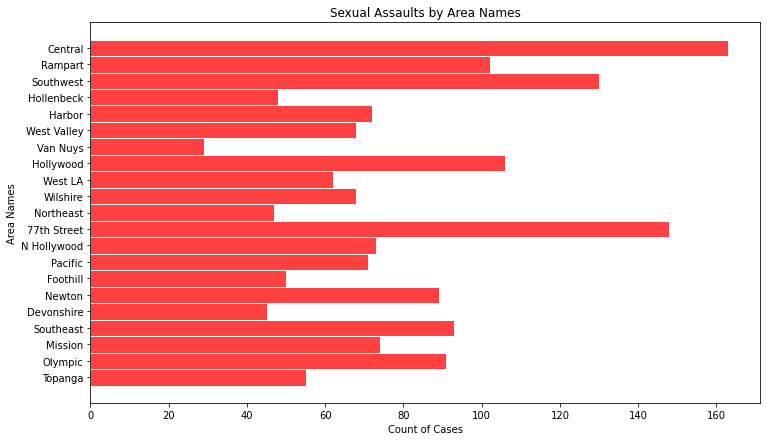

In [42]:
f, ax = plt.subplots(figsize = (12,7))
ax = sns.histplot(data = sexual_assault, y= 'AREA NAME', color = 'red', edgecolor = 'white')
ax.set_xlabel('Count of Cases')
ax.set_ylabel('Area Names')
ax.set_title('Sexual Assaults by Area Names')
plt.show()

On analyzing we see the most-Sexual cases happen in AREA 12 **(77th Street)** and AREA 1 **(Central)** which are also the areas where most-crimes occur!